# Import all Necessary Libraries

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sns.set()

# Built in Functions

In [53]:
def remove_stopwords(sentence):
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", 
                "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", 
                "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", 
                "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
                "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him",
                "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", 
                "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", 
                "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
                "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
                "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them",
                "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll",
                "they're", "they've", "this", "those", "through", "to", "too", "under", "until",
                "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", 
                "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", 
                "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", 
                "your", "yours", "yourself", "yourselves"]
    
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

def fit_tokenizer(train_sentences, num_words, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token, num_words = num_words)
    tokenizer.fit_on_texts(train_sentences)
        
    return tokenizer

def seq_and_pad(sentences, tokenizer, padding, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)
    padded_sequences = pad_sequences(sequences, maxlen = maxlen, padding = padding)
    
    return padded_sequences

In [7]:
data = pd.read_csv("train.csv")

In [29]:
test_data = pd.read_csv("test.csv")
test_data.head()

,sentiment,id,data,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [8]:
data.head()

,sentiment,id,data,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
sentiments = data["sentiment"]
text = data["text"]

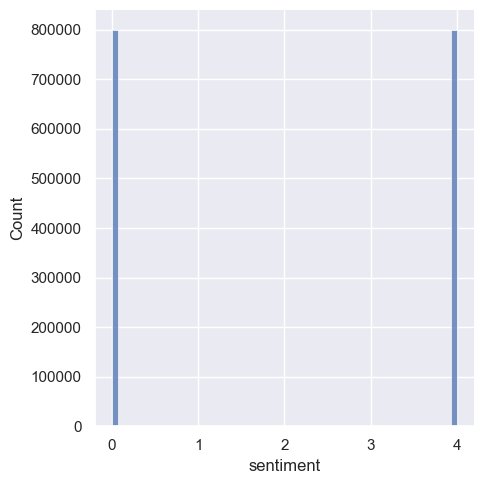

In [13]:
sns.displot(sentiments)

In [66]:
max_length = max(len(string) for string in list(text))
print(max_length)

359


In [67]:
NUM_WORDS = 2000
EMBEDDING_DIM = 16
MAXLEN = max_length
PADDING = 'post'
OOV_TOKEN = "<OOV>"

In [24]:
sent_lis = []

for x in range(len(text)):
    sent = remove_stopwords(str(remove_stopwords(str(text[x]))))
    sent_lis.append(sent)

sent_lis[:5]

['@switchfoot http://twitpic.com/2y1zl - awww, bummer. shoulda got david carr third day it. ;d',
 "upset can't update facebook texting it... might cry result school today also. blah!",
 '@kenichan dived many times ball. managed save 50% rest go bounds',
 'whole body feels itchy like fire',
 "@nationwideclass no, not behaving all. mad. here? can't see there."]

In [25]:
sentences_lowered  = [string.lower() for string in sent_lis]
print(sentences_lowered[:5])

['@switchfoot http://twitpic.com/2y1zl - awww, bummer. shoulda got david carr third day it. ;d', "upset can't update facebook texting it... might cry result school today also. blah!", '@kenichan dived many times ball. managed save 50% rest go bounds', 'whole body feels itchy like fire', "@nationwideclass no, not behaving all. mad. here? can't see there."]


In [38]:
test_text = list(test_data["text"])
test_text[:2]

['@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.',
 'Reading my kindle2...  Love it... Lee childs is good read.']

In [40]:
test_sent_lis = [string.lower() for string in test_text]
print(test_sent_lis[:5])

['@stellargirl i loooooooovvvvvveee my kindle2. not that the dx is cool, but the 2 is fantastic in its own right.', 'reading my kindle2...  love it... lee childs is good read.', 'ok, first assesment of the #kindle2 ...it fucking rocks!!!', "@kenburbary you'll love your kindle2. i've had mine for a few months and never looked back. the new big one is huge! no need for remorse! :)", "@mikefish  fair enough. but i have the kindle2 and i think it's perfect  :)"]


In [27]:
tokenizer = fit_tokenizer(text, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 690436 words

<OOV> token included in vocabulary


In [41]:
train_padded_seq = seq_and_pad(sentences_lowered, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(test_sent_lis, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (1600000, 120)

Padded validation sequences have shape: (498, 120)


# Model

In [61]:
def create_model(num_words, embedding_dim, maxlen):    
    tf.random.set_seed(123)
        
    model = tf.keras.Sequential([ 
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax'),
    ])
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy']) 

    return model

In [62]:
train_sentiments = np.array(sentiments)
test_sentiments = np.array(list(test_data["sentiment"]))

print(train_sentiments[:3])
print(test_sentiments[:3])
print(train_padded_seq[:1])
print(val_padded_seq[:1])

[0 0 0]
[4 4 4]
[[  1  40 148  57   1 474   1   1  49 829   1   1  31  10 386   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
[[  1   2   1   6   1  25  18   4   1   9 206  19   4  75   9   1  11  72
  523 118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   

In [68]:
model = create_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)

history = model.fit(train_padded_seq, train_sentiments, epochs=10, validation_data=(val_padded_seq, test_sentiments))

Epoch 1/10


ValueError: in user code:

    File "c:\Users\haris\miniconda3\envs\miniconda-py3-tf2.0\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\haris\miniconda3\envs\miniconda-py3-tf2.0\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\haris\miniconda3\envs\miniconda-py3-tf2.0\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\haris\miniconda3\envs\miniconda-py3-tf2.0\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\haris\miniconda3\envs\miniconda-py3-tf2.0\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\haris\miniconda3\envs\miniconda-py3-tf2.0\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 359), found shape=(32, 120)


In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")